### 목표
- 타이타닉 데이터를 모델에 학습시켜서 생존/사망 예측해보자
- 머신러닝의 전체 과정을 진행해보자

#### 1. 문제 정의
- Kaggle에서 제공하는 타이타닉 데이터를 사용해 승객의 생존 여부 예측
- 지도 학습
- Survived 컬럼은 데이터값은 수치형이지만 0,1로 생존 여부만 구분하고 있기 때문에 우선순위는 없음
  |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns # 시각화 도구

#### 2. 데이터 수집
- 타이타닉 train 데이터와 test 데이터를 변수 train, test에 저장하기

In [5]:
train = pd.read_csv('data/train.csv', index_col= 'PassengerId')
test = pd.read_csv('data/test.csv', index_col= 'PassengerId')

train.head()
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# 크기 확인
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


#### 3. 데이터 전처리 및 데이터 탐색

In [7]:
# 훈련 데이터셋 정보 확인
train.info()

#결측치가 있는 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [31]:
#컬럼 정보 관리
train.columns

'''
Pclass : 객실의 등급(1, 상위, 2:중상위, 3하위층)
SibSp : 형제자매/ 배우자(동승한)
Parch : 부모/자식(동승한)
Ticket : 티켓번호
Fare : 요금
Cabin : 객실 번호
Embarked : (S, C, Q)
'''

'\nPclass : 객실의 등급(1, 상위, 2:중상위, 3하위층)\nSibSp : 형제자매/ 배우자(동승한)\nParch : 부모/자식(동승한)\nTicket : 티켓번호\nFare : 요금\nCabin : 객실 번호\nEmbarked : (S, C, Q)\n'

In [32]:
test.info()
# Survived 컬럼 없음
# 결측치가 있는 컬럼; Age, Fare, Cabin
# 필요시 인코딩



<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


##### 결측치 채우기
- train : Age, Cabin, Embarked
- test : Age, Fare, Cabin

In [ ]:
# 겶측치를 채우는 방법
# 1. 결측치가 있는 행 전체를 삭제하는 방법
# > 삭제하려는 데이터가 너무 많거나, 모델링에 치명적이지 않은 데이터여야만 한다.
# > 데이터가 많을수록 과대적합을 피할 수 있는데, 삭제해버리면 학습할 데이터가 줄어들어버림

# 2. 결측치를 다른 값(대표값)으로 대체하는 방법
# > 평균, 최빈값, 중앙값


- train  - Embarked 컬럼 결측치 채우기

In [33]:
train['Embarked'].value_counts()

Embarked
0    891
Name: count, dtype: int64

In [34]:
# Embarked 컬럼의 결측치는?
train['Embarked'].isnull().sum() #1 or 0

0

In [35]:
# 결측치가 있는 데이터 출력
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [36]:
# fillna('값')
# 비어있는 데이터가 있다면, '값'으로 채워주는 함수
train['Embarked'].fillna('S')

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    0
890    0
891    0
Name: Embarked, Length: 891, dtype: int64

In [37]:
train['Embarked'] = train['Embarked'].isnull().sum() #최빈값으로 결측치 처리

train['Embarked'].isnull().sum()  #남은 결측치 없음


0

- test : Fare 컬럼의 결측치를 채우기

In [38]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [39]:
# 상관관계 확인
test.corr(numeric_only = True) # 숫자 컬럼 포함

# 상관 계수 : -1 ~ 1 범위로 표현됨
# -1 or 1에 가까울수록 해당 컬럼과 상관관계가 높다.
# 0에 가까울수록 해당 컬럼과 상관이 없음



,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [40]:
train.corr(numeric_only = True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN


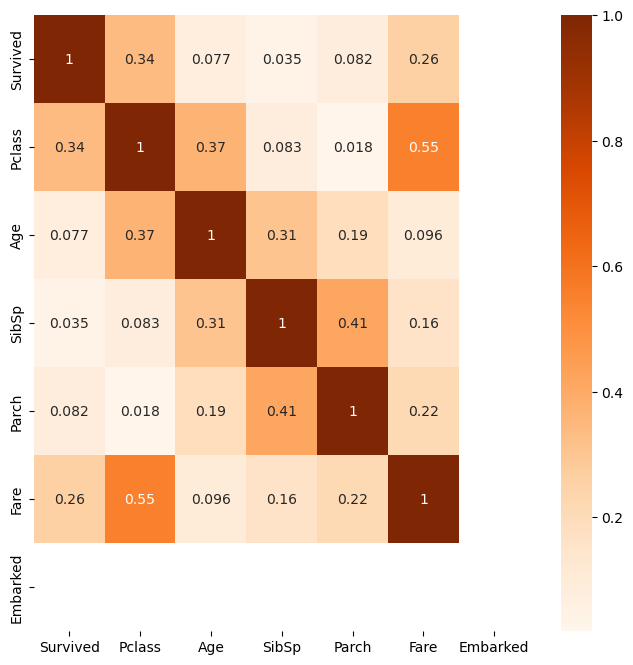

In [41]:
#히트맵 표현
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(numeric_only = True).abs(), annot = True, cmap ='Oranges') #절대값 abs
plt.show()

In [42]:
#train Pclass 컬럼
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [44]:
# 객실등급 기준으로 그룹화 groupby(), 요금 컬럼 집계함수 중앙값 medean()

train[['Pclass', 'Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [54]:
# Pclass, Sex을 기준으로 그룹핑하여 Fare의 중앙값 확인

train[['Pclass','Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [55]:
# 결측치가 있는 행 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [60]:
#fillna를 사용해서 결측치 채우기
test['Fare'] = test['Fare'].fillna(7.925)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train, test Age 채우기
    - 위에서 사용했던 Pclass, Sex 컬럼을 Grouping해서 Age의 집계를 확인하고 채워보자.

In [63]:
# 평균값을 쓸지, 중앙값을 쓸지 판단을 위해 Age 컬럼의 기술통계량 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [66]:
# Age는 Pclass와 상관관계가 높았음
# Pclass, Sex을 그룹핑하여 Age의 평균 출력
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [68]:
# gb1 - index 2개 - Pclass, Sex

# ★멀티인덱스에서의 데이터 접근 

# 2등석, 남성: 평균 나이
gb1.loc[(2,'male'), : ]
gb1.loc[(2,'male')]

Age    30.740707
Name: (2, male), dtype: float64

In [69]:
# train Age 결측치가 있는 행 출력
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,0
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,0


In [70]:
gb1.loc[(2,'male')]

Age    30.740707
Name: (2, male), dtype: float64

In [71]:
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [96]:
# 규칙에 맞게 Pclass와 Sex에 따른 Age값 반환하는 함수
def fill_age(row):
    #row : 받아오는 행의 데이터 (매개변수)

    # 만약 Age컬럼이 결측치라면 gb1 테이블의 값을 인덱싱
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'],row['Sex'])] #.iloc[0]

    # 결측치가 아니라면 ~ 원래 나이 값을 사용
    else:
        return row['Age']

In [97]:
train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 83.5+ KB


In [98]:
test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


## 정리
- apply, fill_age
- 테스트 데이터를 행단위로 쪼갠 것을 매개변수로 내줘서 안쪽 로직이 동작하도록 만듦.
- 결과값으로 Age를 채울 수 있는 대표값(gb1?) 반환
- 정수형(astype int)으로 반환해서 데이터의 'Age' 컬럼에 넣어줌

- train, test Cabin 채우기
    - Cabin 컬럼 데이터 확인
    - 임의의 값으로 결측치를 채울 예정

In [92]:
# train 기준으로 데이터 확인
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
    `